
ISLAMIC BANK SIMULATION
Bank Capital: 50,000.00 | Bank Loan (@25.00%): 62,500.00

---------END OF SIMULATION----------
Status: SUCCESS
Total period of payment t = 10 months | Within grace period

Loan Remaining: 0.00 | Loan Paid: 62,500.00
Profit made (@25.00%): 405,513.45 | Final bank payment (@12.00%): 24,629.82 | Net profit: 378,883.62
Amount Reinvested: 3,620,991.20



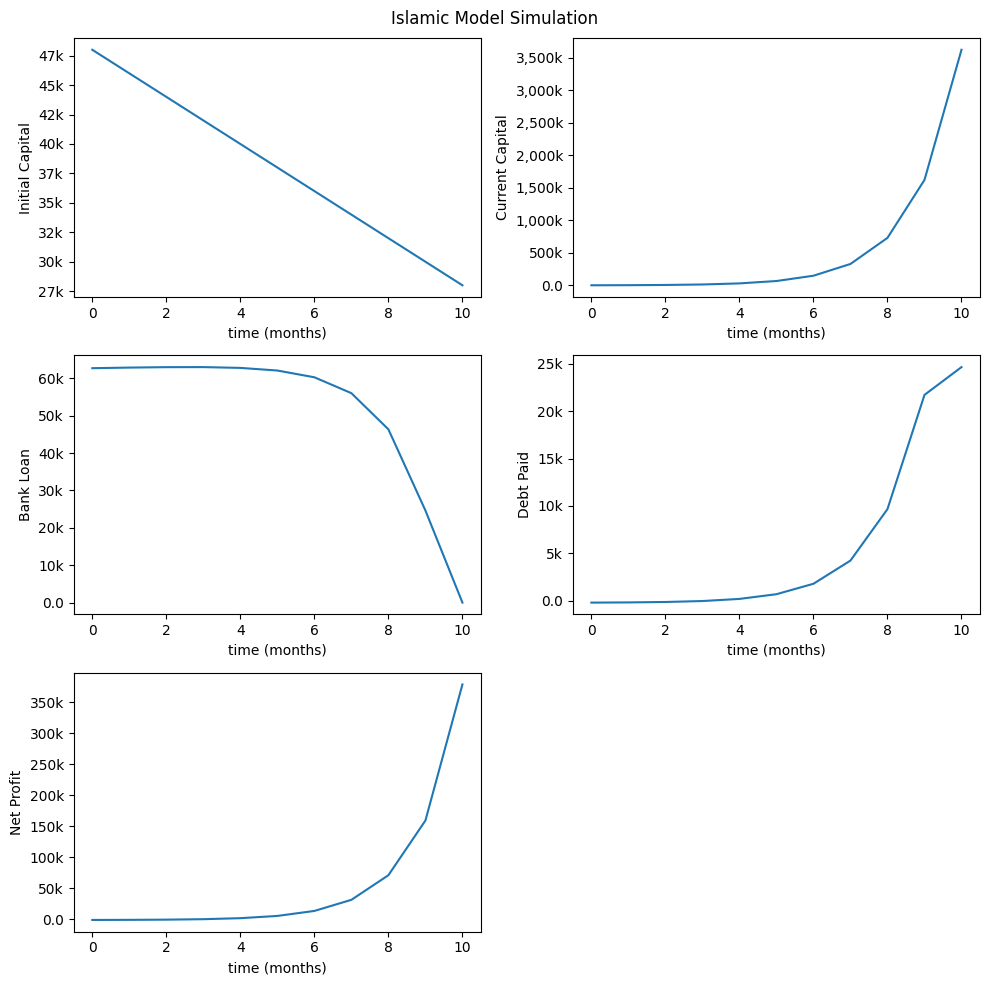

In [1]:
from models.islamic_bank import IslamicModel
from models.conventional_bank import ConventionalModel

# setting parameter values for consistency
INITIAL_CAPITAL: int = 50_000
CURRENT_CAPITAL: int = 0
PROFIT_MARGIN: float = 0.25
EXPENSES: float = 2000.0
BANK_FEE: float = 0.25
BANK_SHARE: float = 0.12
INTEREST_RATE: float = 0.012
LOAN_PERIOD: int = 1
INITIAL_CAPITAL_REINVESTMENT: float = 2_000

# simulation time in months
SIMULATION_TIME: int = 50
GRACE_PERIOD: int = 10

# creating model objects
model_islamic = IslamicModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=PROFIT_MARGIN,
    expenses=EXPENSES,
    bank_fee=BANK_FEE,
    bank_share=BANK_SHARE,
    initial_capital_reinvestment=INITIAL_CAPITAL_REINVESTMENT
)

model_conventional = ConventionalModel(
    initial_capital=INITIAL_CAPITAL,
    current_capital=CURRENT_CAPITAL,
    profit_margin=PROFIT_MARGIN,
    expenses=EXPENSES,
    interest_rate=INTEREST_RATE,
    loan_period=LOAN_PERIOD,
    initial_capital_reinvestment=INITIAL_CAPITAL_REINVESTMENT
)

# simulating the models
model_islamic.simulate(time_period=SIMULATION_TIME, grace_period=GRACE_PERIOD)

fig, ax1, ax2, ax3, ax4, ax5 = model_islamic.simulation_graphs()
# model_conventional.simulate(time_period=SIMULATION_TIME, grace_period=GRACE_PERIOD)